In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('bsbm.csv')
df

,program,profile,graph,load,process
0,rust single,RDFS,500037,2.957539,0.086992
1,rust par,RDFS,500037,2.960895,0.067385
2,rust single,RDFS,500037,2.898779,0.081463
3,rust par,RDFS,500037,2.880278,0.072031
4,rust single,RDFS,500037,2.907352,0.095831
5,rust par,RDFS,500037,2.888126,0.081061
6,rust single,RDFS,500037,2.892724,0.075456
7,rust par,RDFS,500037,2.903294,0.071603
8,rust single,RDFS,500037,2.929783,0.071350
9,rust par,RDFS,500037,2.892081,0.071764


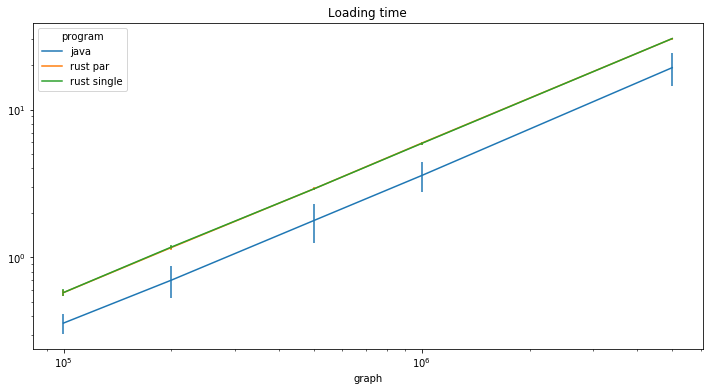

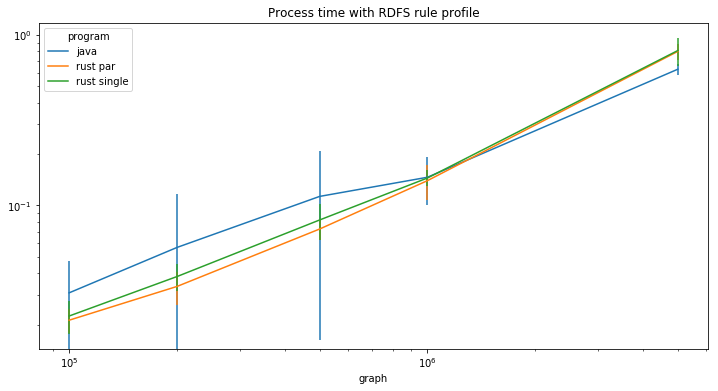

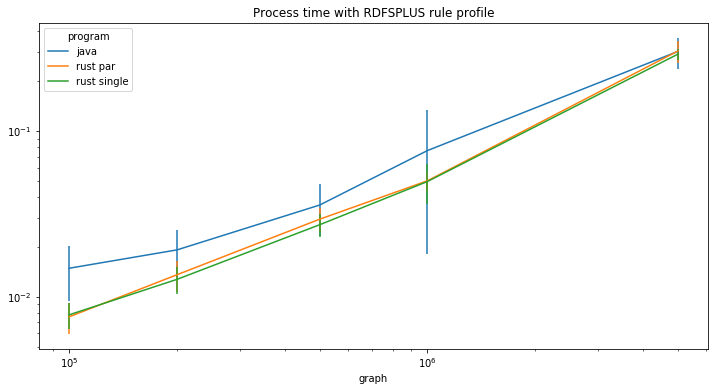

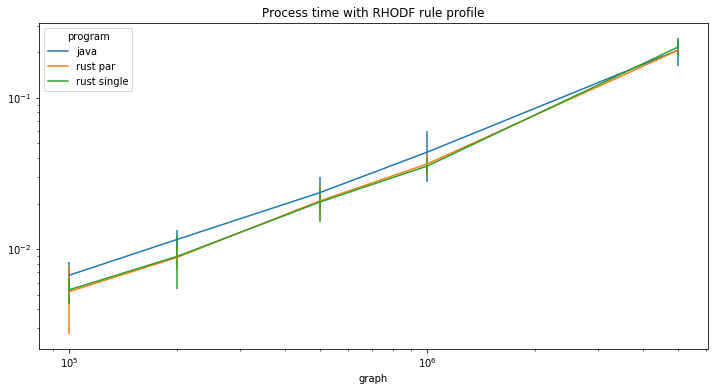

In [13]:
profiles = list(set(df['profile']))
data = df.groupby(['program','graph'])
means = data['load'].mean().unstack().transpose()
stdev = data['load'].std().unstack().transpose()
ax = means.plot(yerr=2*stdev,title='Loading time',loglog=True,figsize=(12,6))
ax.get_figure().savefig('bsbm_load.png')
ax
for profile in profiles:
    data = df[df['profile']==profile].groupby(['program','graph'])
    means = data['process'].mean().unstack().transpose()
    stdev = data['process'].std().unstack().transpose()
    ax = means.plot(yerr=2*stdev,title='Process time with {} rule profile'.format(profile),loglog=True, figsize=(12,6))
    ax.get_figure().savefig("bsbm_{}.png".format(profile))
    ax